In [2]:
"""
https://gym.openai.com/
"""
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym.envs.registration import register

In [7]:
register(id="FrozenLakeNotSlippery-v0",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
        )

#         "SFFF",
#         "FHFH",
#         "FFFH",
#         "HFFG"


In [8]:
env=gym.make("FrozenLakeNotSlippery-v0")
env.reset()

C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\user\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


0

In [ ]:
# LEFT = 0
# DOWN = 1
# RIGHT = 2
# UP = 3

In [9]:
complete_actions=[2, 2, 1, 1, 1, 2]
for action in complete_actions:
    new_state, reward, done, _ =env.step(action)#action을 적용
    env.render() #현재 state 출력
    if done is True:
        print("도착, reward: {}".format(reward))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
도착, reward: 1.0


In [11]:
register(id="FrozenLakeNotSlippery-v3",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':True},
        )

#         "SFFF",
#         "FHFH",
#         "FFFH",
#         "HFFG"


In [12]:
env=gym.make("FrozenLakeNotSlippery-v3")
env.reset()
complete_actions=[2, 2, 1, 1, 1, 2]
for action in complete_actions:
    new_state, reward, done, _ =env.step(action)#action을 적용
    env.render() #현재 state 출력
    if done is True:
        print("도착, reward: {}".format(reward))

  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


In [13]:
register(id="FrozenLakeNotSlippery-v4",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
        )
#         "SFFF",
#         "FHFH",
#         "FFFH",
#         "HFFG"


In [15]:
env=gym.make("FrozenLakeNotSlippery-v4")
env.render()


SFFF
FHFH
FFFH
HFFG


In [22]:
import random
env.action_space.n #action의 종류
random.randint(0,env.action_space.n-1) #0~3 정수

4

Success rate:0.0145


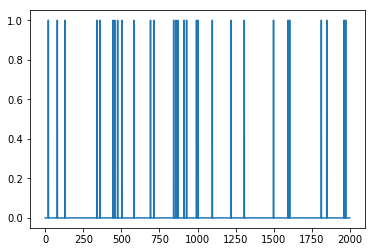

In [25]:
num_episodes=2000
rList=[]
for i in range(num_episodes):
    env.reset()
    done=False
    rAll=0
    while not done:
        action=random.randint(0,env.action_space.n-1) #0~3 정수
        _state, reward, done, _info=env.step(action)
        rAll+=reward
    rList.append(rAll)
print("Success rate:" + str(sum(rList)/num_episodes))
plt.plot(rList)
plt.show()

In [26]:
register(id="FrozenLakeNotSlippery-v5",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
        )

In [27]:
env=gym.make("FrozenLakeNotSlippery-v5")

In [41]:
env.action_space.n #4
env.observation_space.n #16

#Q테이블 생성(16*4)
Q=np.zeros([env.observation_space.n,env.action_space.n])
num_episodes=2000

In [42]:
import random as pr
def rargmax(vector):
    m=np.amax(vector)
    indices=np.nonzero(vector==m)[0]
    return pr.choice(indices)    

성공률 : 0.937
LEFT DOWN RIGHT UP
[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


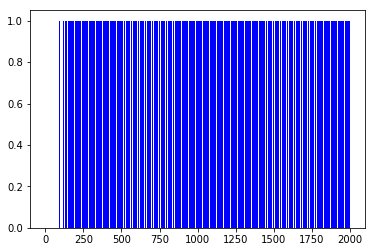

In [43]:
rList=[]
for i in range(num_episodes):
    state=env.reset() #0번 state에서 시작
    done=False
    rAll=0
    #Q테이블 학습 알고리즘
    while not done:
        action=rargmax(Q[state, :])
        new_state, reward, done, _ =env.step(action)
        Q[state,action]=reward+np.max(Q[new_state, :])
        rAll+=reward
        state=new_state
    rList.append(rAll)
print("성공률 : "+str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()        

In [44]:
a=np.arange(3,10)
a
np.amax(a)
a=np.array([1,0,0,1,2,0])
np.nonzero(a)

(array([0, 3, 4], dtype=int64),)

In [ ]:
#gamma(discounted factor)추가

In [45]:
register(id="FrozenLakeNotSlippery-v6",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
        )

In [46]:
env=gym.make("FrozenLakeNotSlippery-v6")

In [47]:
#Q테이블 생성(16*4)
Q=np.zeros([env.observation_space.n,env.action_space.n])
num_episodes=2000

In [48]:
dis=.89 #discounted factor

In [49]:
np.random.randn(1,4)

array([[ 0.43426695, -0.59400382,  1.01706599, -1.04849973]])

성공률 : 0.9485
LEFT DOWN RIGHT UP
[[0.         0.55840594 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.704969   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.62742241 0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.704969   0.        ]
 [0.         0.         0.7921     0.        ]
 [0.         0.89       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


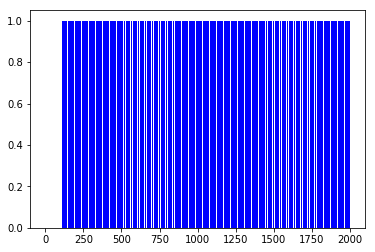

In [50]:
rList=[]
for i in range(num_episodes):
    state=env.reset() #0번 state에서 시작
    done=False
    rAll=0
    #Q테이블 학습 알고리즘
    while not done:
        action=np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1))
        new_state, reward, done, _ =env.step(action)
        Q[state,action]=reward+ dis * np.max(Q[new_state, :])
        rAll+=reward
        state=new_state
    rList.append(rAll)
print("성공률 : "+str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()        

In [51]:
#e greedy

In [3]:
register(id="FrozenLakeNotSlippery-v7",
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name':'4x4', 'is_slippery':False},
        )

In [4]:
env=gym.make("FrozenLakeNotSlippery-v7")
#Q테이블 생성(16*4)
Q=np.zeros([env.observation_space.n,env.action_space.n])
num_episodes=2000
dis=.89 #discounted factor

성공률 : 0.799
LEFT DOWN RIGHT UP
[[0.49698129 0.44231335 0.55840594 0.49698129]
 [0.49698129 0.         0.62742241 0.55840594]
 [0.55840594 0.704969   0.55840594 0.62742241]
 [0.62742241 0.         0.55840594 0.55840594]
 [0.44231335 0.39365888 0.         0.49698129]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.         0.62742241]
 [0.         0.         0.         0.        ]
 [0.39365888 0.         0.         0.44231335]
 [0.39365888 0.7921     0.7921     0.        ]
 [0.704969   0.89       0.         0.704969  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.7921     0.89       0.704969  ]
 [0.7921     0.89       1.         0.7921    ]
 [0.         0.         0.         0.        ]]


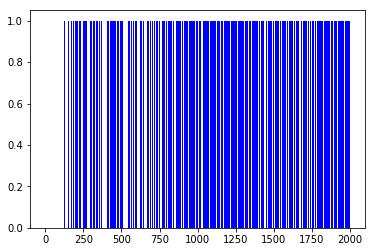

In [5]:
rList=[]
for i in range(num_episodes):
    state=env.reset() #0번 state에서 시작
    done=False
    rAll=0
    e=1. / ((i//100)+1) #e: 1. -> 0.5 -> .. -> 0.05
    
    #Q테이블 학습 알고리즘
    while not done:
        #action=np.argmax(Q[state,:]+np.random.randn(1, env.action_space.n) / (i+1))
        if np.random.rand(1)<e:
            action=env.action_space.sample()
        else:
            action=np.argmax(Q[state,:])        
        
        new_state, reward, done, _ =env.step(action)
        Q[state,action]=reward+ dis * np.max(Q[new_state, :])
        rAll+=reward
        state=new_state
    rList.append(rAll)
print("성공률 : "+str(sum(rList)/num_episodes))
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='blue')
plt.show()        

In [57]:
for i in range(num_episodes):
    print(1. / ((i//100)+1))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.33333333

In [66]:
env.action_space.sample() #random 동작

1